In [26]:
import pandas as pd
import numpy as np
from collections import *
import sklearn
from sklearn.model_selection import train_test_split
from math import *

%matplotlib inline

In [3]:
iris = sklearn.datasets.load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
cols = ['f1', 'f2', 'f3', 'f4']
X = iris['data']
y = iris['target']
data = pd.DataFrame(X, columns=cols)
data['y'] = y

In [15]:
data

,f1,f2,f3,f4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
train, test = train_test_split(data, test_size=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9559092128>,
      dtype=object)

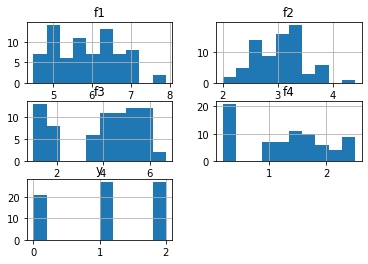

In [20]:
train.hist()

## $$ P(F|C) $$

- probability of the features given the class

In [22]:
params_fc = {}

for y_val in set(train.y):
    sub = train[train.y == y_val]
    for f in cols:
        params_fc['{}-{}'.format(y_val, f)] = (sub[f].mean(), sub[f].std())
    

In [23]:
params_fc

{'0-f1': (4.999999999999999, 0.3391164991562635),
 '0-f2': (3.4095238095238094, 0.42767366286078684),
 '0-f3': (1.4999999999999998, 0.21213203435596426),
 '0-f4': (0.2714285714285715, 0.09023778112773573),
 '1-f1': (5.851851851851853, 0.5243093408478289),
 '1-f2': (2.7481481481481476, 0.3389694453786136),
 '1-f3': (4.177777777777778, 0.48701076700570717),
 '1-f4': (1.3148148148148147, 0.20884978721136782),
 '2-f1': (6.596296296296296, 0.6179877279597323),
 '2-f2': (3.0111111111111115, 0.3355057414771057),
 '2-f3': (5.52962962962963, 0.49366355314495686),
 '2-f4': (2.055555555555555, 0.2873396989002782)}

## $$ P(F) $$

- probability of features

In [24]:
params_f = {}

for f in cols:
    params_f[f] = (train[f].mean(), train[f].std())

In [25]:
params_f

{'f1': (5.881333333333332, 0.8179891847123079),
 'f2': (3.0279999999999996, 0.4464756886332562),
 'f3': (3.9146666666666663, 1.6770867061126622),
 'f4': (1.2893333333333334, 0.7449965233608944)}

In [40]:
def gaussian(x, mu, sig):
    return 1.0 / (sqrt(2.0*pi)*sig)*np.exp(-np.power((x-mu)/sig, 2.0)/2.0)

#P(F|C)
def Pfc(feat='', F='', C=''):
    mu, sigma = params_fc['{}-{}'.format(C, feat)]
    return gaussian(F, mu, sigma)

#P(F)
def Pf(feat='', F=''):
    mu, sigma = params_f[feat]
    return gaussian(F, mu, sigma)

#P(C)
def Pc(C=''):
    return 1.0/3.0

#P(C|F) = P(F|C) * P(C) / P(F)
def Pcf(feat='', C='', F=''):
    return Pfc(feat, F, C) * Pc(C) / Pf(feat, F)

### Test

In [52]:
for y_val in set(test.y):
    test[str(y_val)] = test.f1.map(lambda x: Pcf(feat='f1', C=y_val, F=x)) *\
    test.f2.map(lambda x: Pcf(feat='f2', C=y_val, F=x)) *\
    test.f3.map(lambda x: Pcf(feat='f3', C=y_val, F=x)) *\
    test.f4.map(lambda x: Pcf(feat='f4', C=y_val, F=x))
    
test['guess'] = test[['0', '1', '2']].idxmax(axis=1)

/home/casey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/casey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [57]:
len(test[test.y.map(str) == test.guess]) / len(test)

0.96

### Test with GaussianNB from sklearn

In [61]:
Xtrain = train[cols].values
ytrain = train.y
Xtest = test[cols].values
ytest = test.y

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [66]:
classifier.fit(Xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
preds = classifier.predict(Xtest)
sklearn.metrics.accuracy_score(ytest, preds)

0.96